In [2]:
import plotly.express as px 
import pandas as pd 
import numpy as np 
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import datetime
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
from sklearn import svm
import itertools 

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from __future__ import absolute_import,division,print_function,unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd


mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal

from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

print("Import Succesfull")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Import Succesfull


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Get some data
df = pd.read_excel("/content/drive/My Drive/Capstone_Commodity_SureshaHP/Tomato/DelhiTomato_31Aug.xlsx",index_col=False)

In [8]:
df.head()

,Unnamed: 0,Date,DELHI_RetailPrice,DELHI_Volume,DieselPrice
0,0,2015-01-01,3285.0,15850.0,53.74
1,1,2015-02-01,3135.0,15178.0,51.96
2,2,2015-03-01,2913.0,14104.0,55.41
3,3,2015-04-01,3283.0,13692.0,52.56
4,4,2015-05-01,3772.0,9535.0,58.19


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DELHI_RetailPrice  67 non-null     float64
 1   DELHI_Volume       67 non-null     float64
 2   DieselPrice        67 non-null     float64
dtypes: float64(3)
memory usage: 1.7 KB


In [10]:
datetime_series = pd.to_datetime(df['Date'])

# create datetime index passing the datetime series
datetime_index = pd.DatetimeIndex(datetime_series.values)

df5=df.set_index(datetime_index)

# we don't need the column anymore
df5.drop('Date',axis=1,inplace=True)

print(df5.index)

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [13]:
col = ['DELHI_RetailPrice','DELHI_Volume','DieselPrice']
df5 = df5[col]
df5.head()

,DELHI_RetailPrice,DELHI_Volume,DieselPrice
2015-01-01,3285.0,15850.0,53.74
2015-02-01,3135.0,15178.0,51.96
2015-03-01,2913.0,14104.0,55.41
2015-04-01,3283.0,13692.0,52.56
2015-05-01,3772.0,9535.0,58.19


In [15]:
from sklearn.model_selection import train_test_split

X = df5.drop(['DELHI_RetailPrice'], axis=1)
#print('X columns: %s' % list(X.columns))

y = df5['DELHI_RetailPrice']

#X = np.array(X).reshape(-1,len(X.columns)) # Reshape to required dimensions for sklearn
#y = np.array(y).reshape(-1,1)

train_size = 0.75

split_index = int(df5.shape[0]*train_size) # the index at which to split df into train and test

X_train = X[:split_index]
y_train = y[:split_index]

X_test = X[split_index:]
y_test = y[split_index:]

# 10. Tensor flow Multivariate

In [16]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [17]:
date_time = pd.to_datetime(df.pop('Date'), format='%d.%m.%Y')

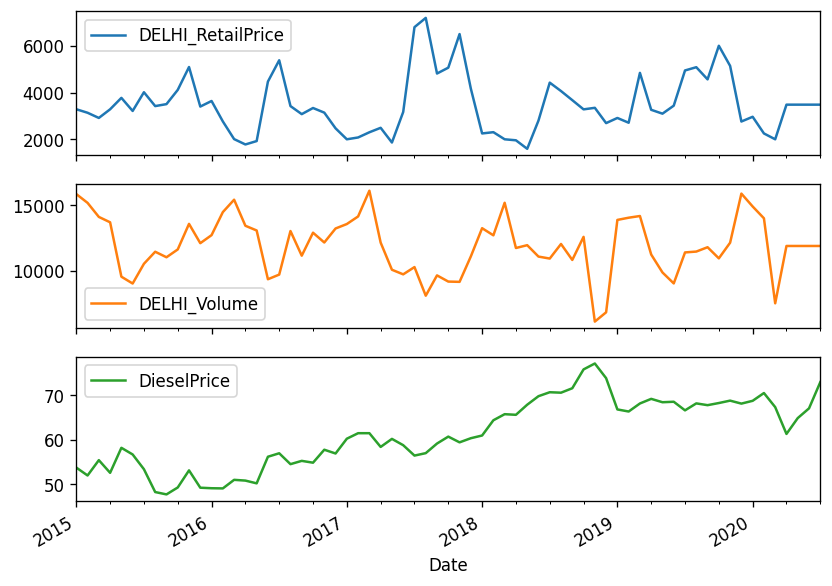

In [26]:
plot_cols = ['DELHI_RetailPrice', 'DELHI_Volume', 'DieselPrice']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

Text(0, 0.5, 'DieselPrice')

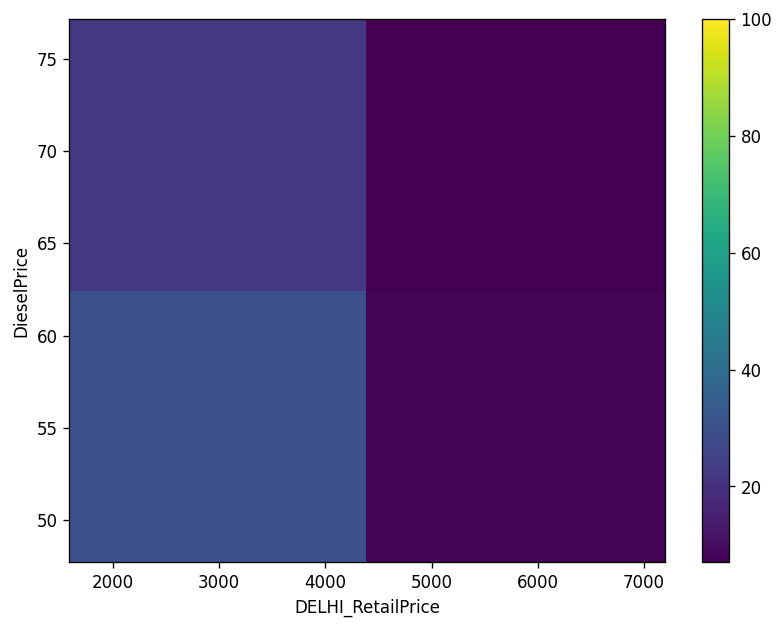

In [27]:
plt.hist2d(df['DELHI_RetailPrice'], df['DieselPrice'], bins=(2, 2), vmax=100)
plt.colorbar()
plt.xlabel('DELHI_RetailPrice')
plt.ylabel('DieselPrice')

In [28]:
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [29]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.75)]
val_df = df[int(n*0.75):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [30]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

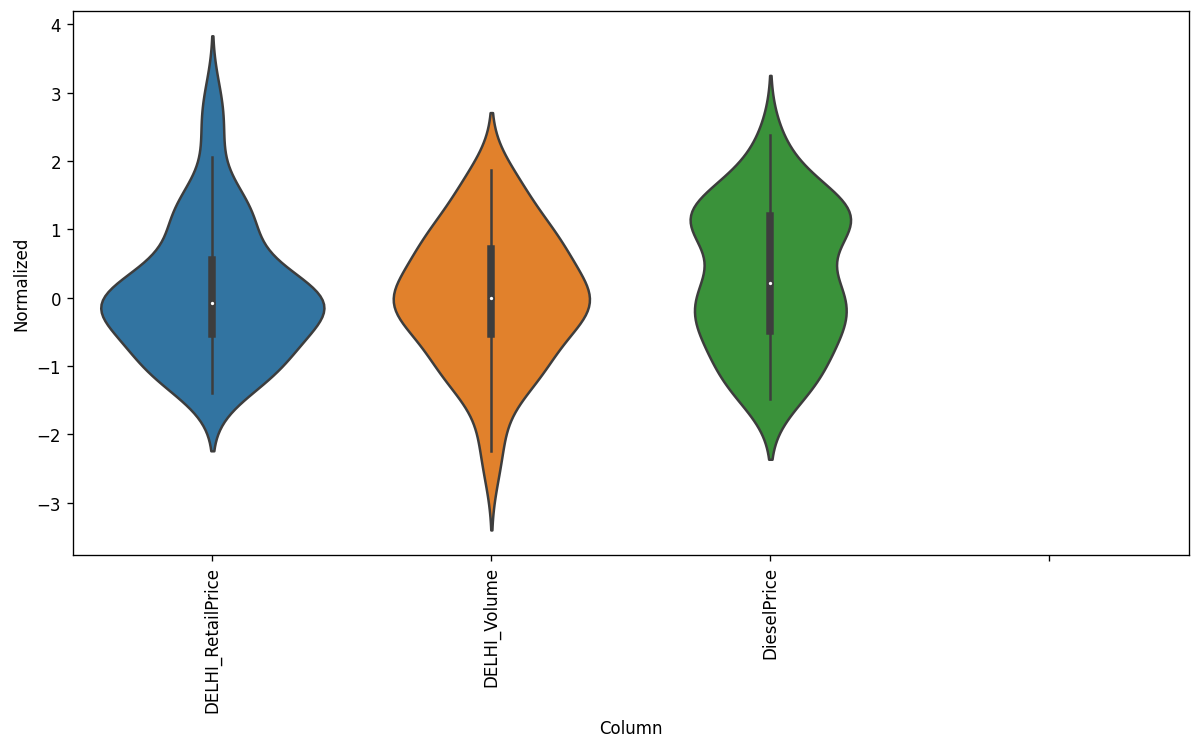

In [38]:
df_std = (df5 - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [39]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [43]:
w1 = WindowGenerator(input_width=34, label_width=33, shift=1,
                     label_columns=['DELHI_RetailPrice'])
w1

Total window size: 35
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
Label indices: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34]
Label column name(s): ['DELHI_RetailPrice']

In [44]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [45]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w1.total_window_size])])


example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (1, 35, 4)
Inputs shape: (1, 34, 4)
labels shape: (1, 33, 1)


In [46]:
w1.example = example_inputs, example_labels

In [47]:
def plot(self, model=None, plot_col='DELHI_RetailPrice', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Date')

WindowGenerator.plot = plot

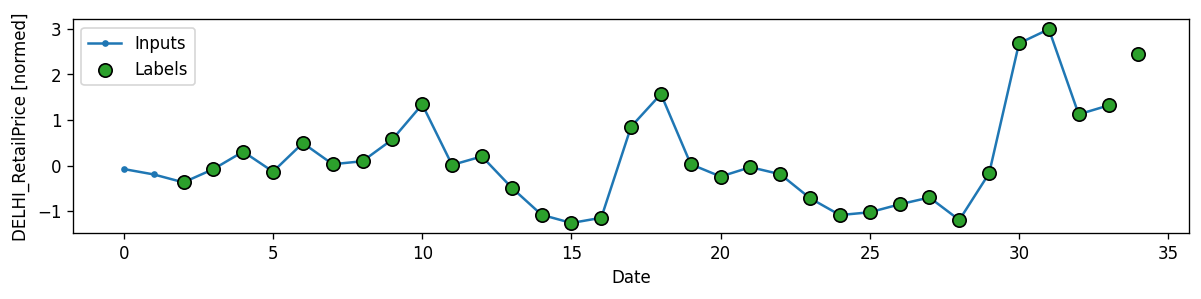

In [48]:
w1.plot()

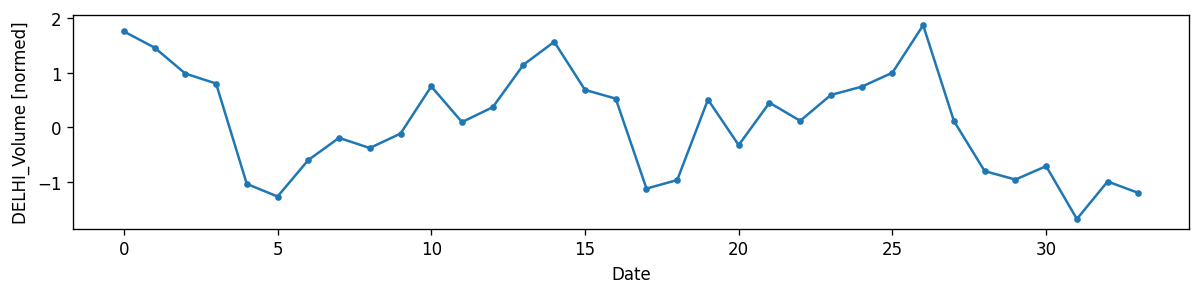

In [50]:
w1.plot(plot_col='DELHI_Volume')

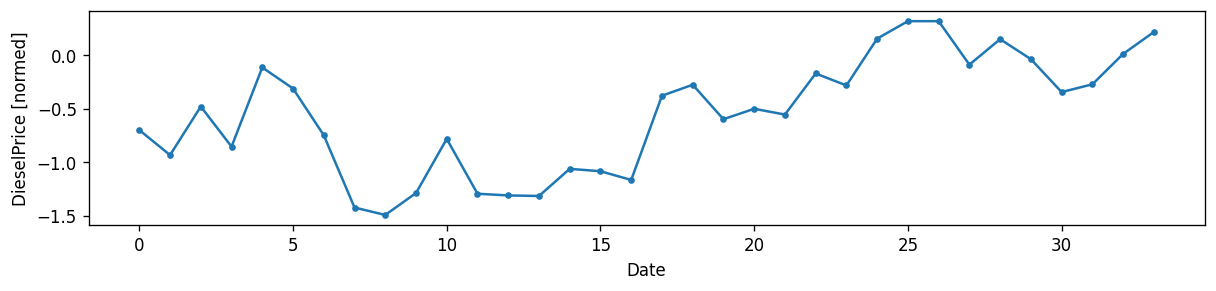

In [51]:
w1.plot(plot_col='DieselPrice')

In [52]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [53]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [54]:
# Each element is an (inputs, label) pair
w1.train.element_spec

(TensorSpec(shape=(None, 34, 4), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 33, 1), dtype=tf.float32, name=None))

In [55]:
for example_inputs, example_labels in w1.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (16, 34, 4)
Labels shape (batch, time, features): (16, 33, 1)


In [57]:
# single step models
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['DELHI_RetailPrice'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['DELHI_RetailPrice']

In [58]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 4)
Labels shape (batch, time, features): (32, 1, 1)


In [59]:
# baseline
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [60]:
import math

In [61]:
baseline = Baseline(label_index=column_indices['DELHI_RetailPrice'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics= [tf.keras.metrics.RootMeanSquaredError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

1/1 [==============================] - 0s 2ms/step - loss: 0.9349 - root_mean_squared_error: 0.9669


In [63]:
wide_window = WindowGenerator(
    input_width=3, label_width=3, shift=1,
    label_columns=['DELHI_RetailPrice'])

wide_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [1 2 3]
Label column name(s): ['DELHI_RetailPrice']

In [64]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', baseline(single_step_window.example[0]).shape)

Input shape: (32, 1, 4)
Output shape: (32, 1, 1)


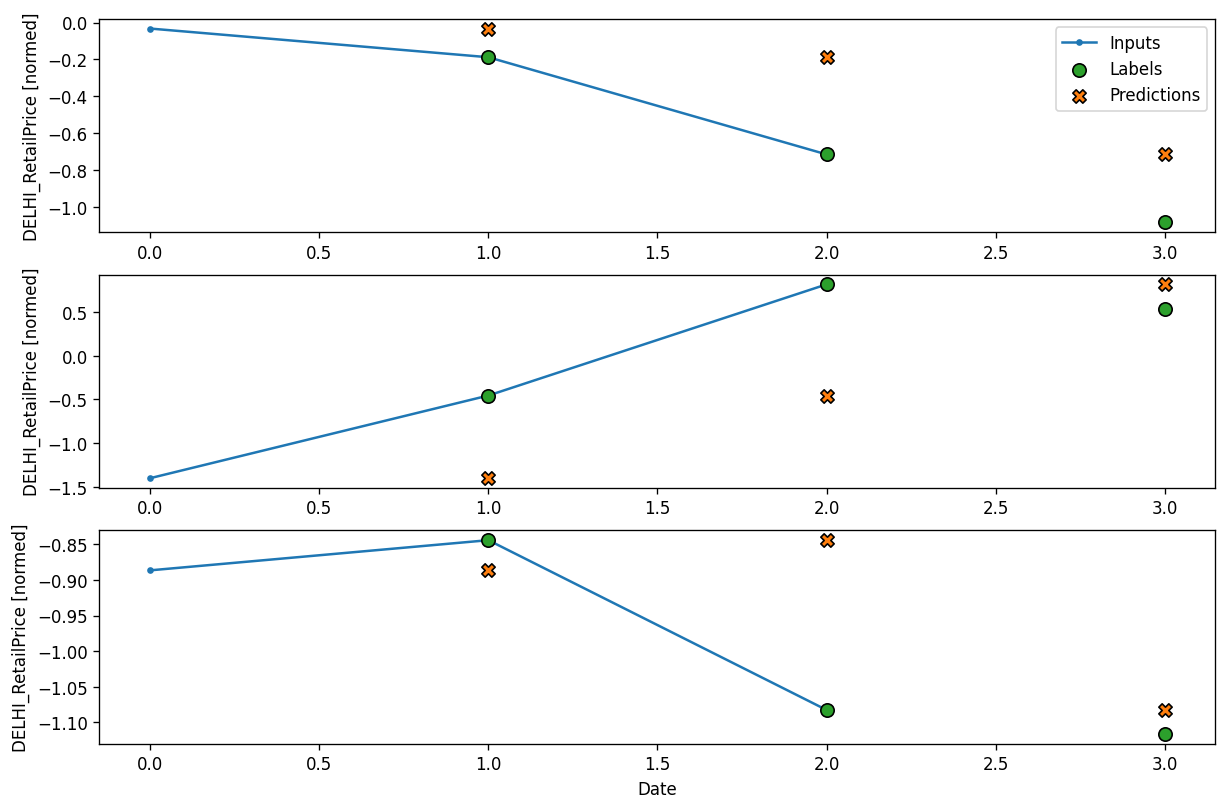

In [65]:
wide_window.plot(baseline)

In [66]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [67]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 4)
Output shape: (32, 1, 1)


In [68]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [69]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
2/2 [==============================] - 0s 53ms/step - loss: 2.4971 - root_mean_squared_error: 1.5802 - val_loss: 5.4976 - val_root_mean_squared_error: 2.3447
Epoch 2/20
2/2 [==============================] - 0s 20ms/step - loss: 2.4835 - root_mean_squared_error: 1.5759 - val_loss: 5.4650 - val_root_mean_squared_error: 2.3377
Epoch 3/20
2/2 [==============================] - 0s 21ms/step - loss: 2.4708 - root_mean_squared_error: 1.5719 - val_loss: 5.4375 - val_root_mean_squared_error: 2.3318
Epoch 4/20
2/2 [==============================] - 0s 21ms/step - loss: 2.4590 - root_mean_squared_error: 1.5681 - val_loss: 5.4070 - val_root_mean_squared_error: 2.3253
Epoch 5/20
2/2 [==============================] - 0s 19ms/step - loss: 2.4467 - root_mean_squared_error: 1.5642 - val_loss: 5.3759 - val_root_mean_squared_error: 2.3186
Epoch 6/20
2/2 [==============================] - 0s 21ms/step - loss: 2.4343 - root_mean_squared_error: 1.5602 - val_loss: 5.3457 - val_root_mean_squared_

In [70]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 3, 4)
Output shape: (32, 3, 1)


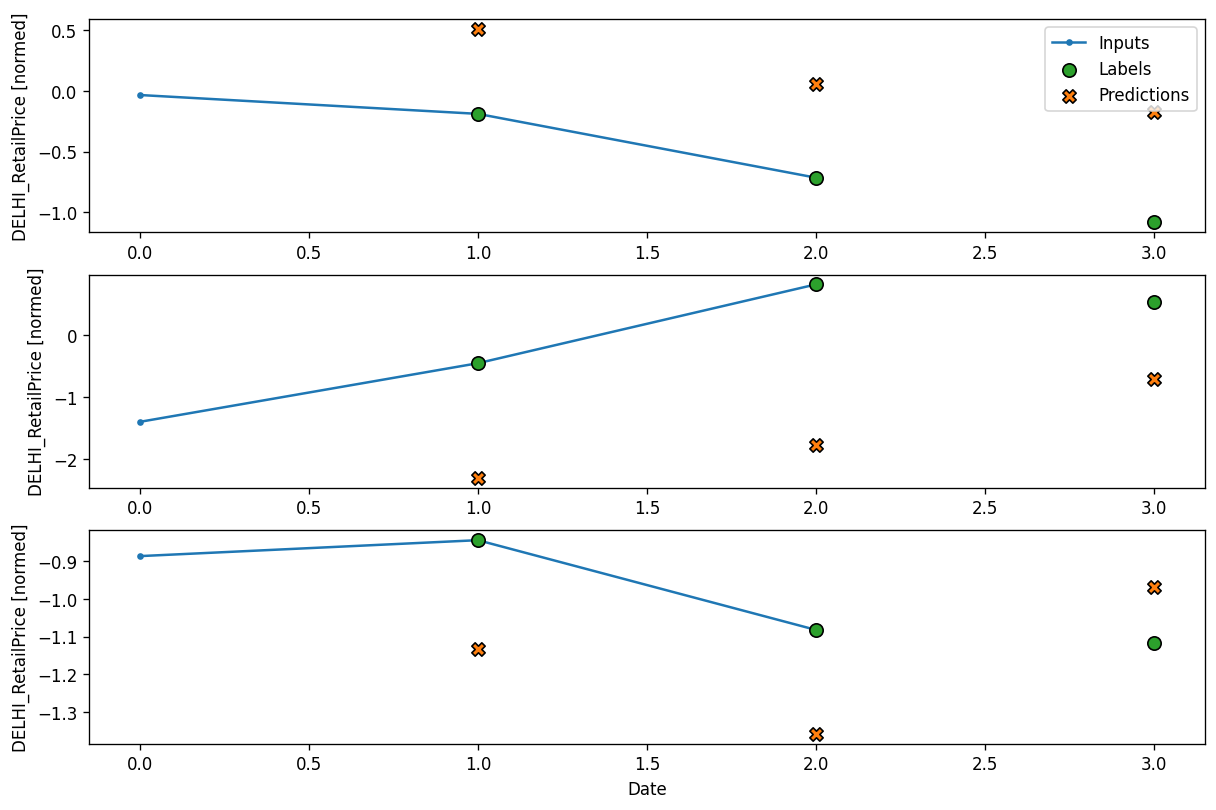

In [71]:
wide_window.plot(linear)

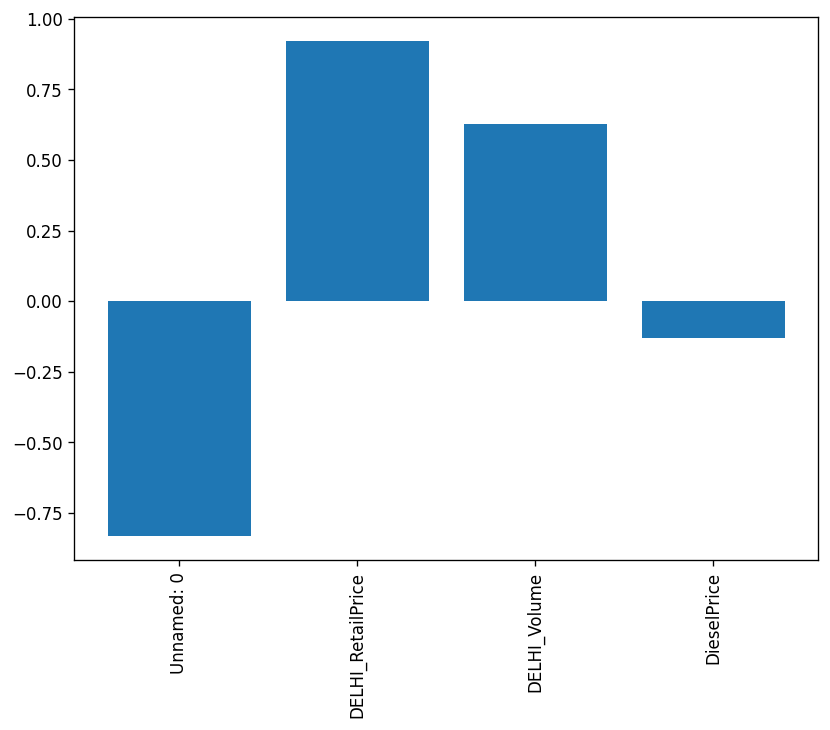

In [74]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [75]:
#dense
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
2/2 [==============================] - 0s 81ms/step - loss: 0.8553 - root_mean_squared_error: 0.9248 - val_loss: 0.9607 - val_root_mean_squared_error: 0.9802
Epoch 2/20
2/2 [==============================] - 0s 24ms/step - loss: 0.7705 - root_mean_squared_error: 0.8778 - val_loss: 0.9976 - val_root_mean_squared_error: 0.9988
Epoch 3/20
1/1 [==============================] - 0s 1ms/step - loss: 1.0162 - root_mean_squared_error: 1.0080


In [76]:
# RNN (LSTM)


lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(67, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [77]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 3, 4)
Output shape: (32, 3, 1)


In [78]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

1/1 [==============================] - 0s 2ms/step - loss: 1.1733 - root_mean_squared_error: 1.0832


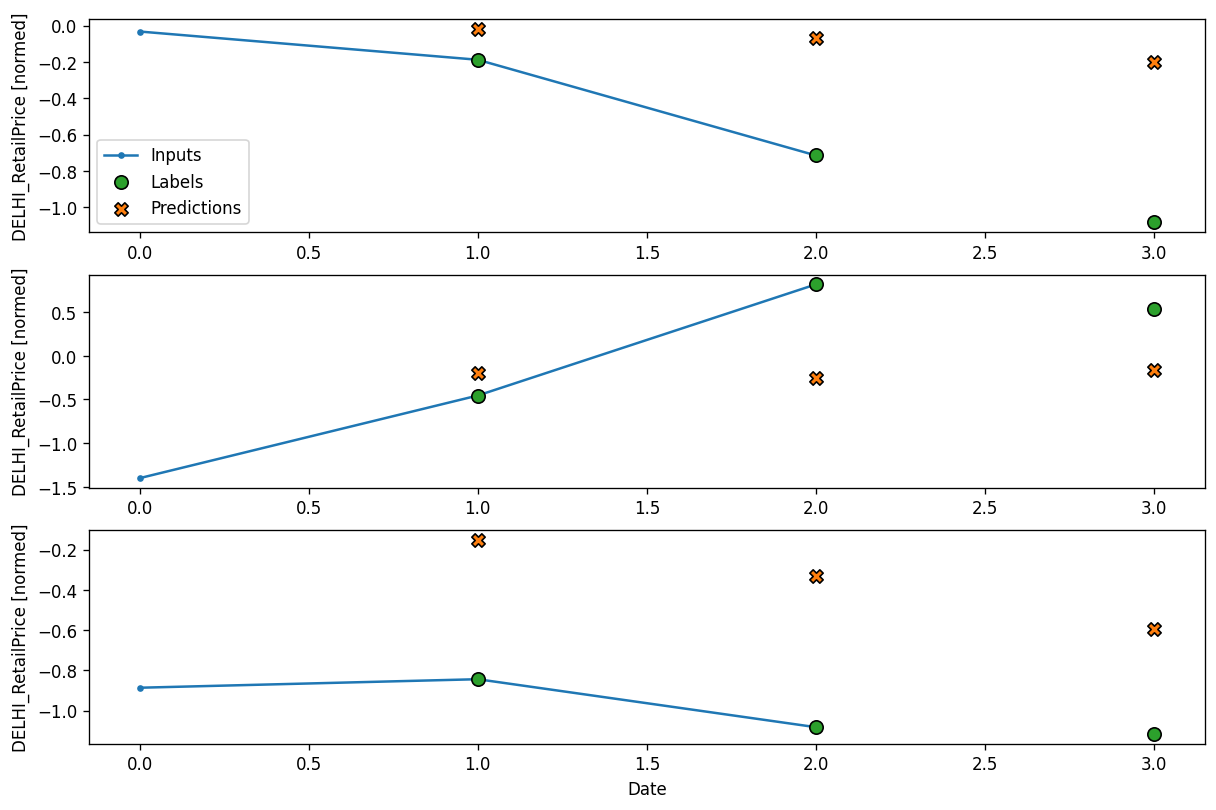

In [79]:
wide_window.plot(lstm_model)

In [80]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.5327
Linear      : 2.5871
Dense       : 0.4455
LSTM        : 0.4399


# Multi-Output models

In [81]:
# Multi-output models

single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (26, 24, 4)
Labels shape (batch, time, features): (26, 24, 4)


In [82]:
# dense

dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [83]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

1/1 [==============================] - 0s 1ms/step - loss: 0.4283 - root_mean_squared_error: 0.6544


In [84]:
# RNN

%%time
wide_window = WindowGenerator(
    input_width=3, label_width=1, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

1/1 [==============================] - 0s 1ms/step - loss: 1.3447 - root_mean_squared_error: 1.1596

CPU times: user 3.94 s, sys: 166 ms, total: 4.11 s
Wall time: 3.88 s


In [85]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each timestep is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [86]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros)
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

1/1 [==============================] - 0s 2ms/step - loss: 0.5643 - root_mean_squared_error: 0.7512

CPU times: user 3.69 s, sys: 177 ms, total: 3.86 s
Wall time: 3.65 s


In [87]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.5327
Linear         : 2.5871
Dense          : 0.7861
LSTM           : 1.1368
Residual LSTM  : 0.7728


# Modeling conclusion - RMSE for XG boost and deeplearning models are less than other univariate models